In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import copy

In [2]:
#This corresponds to pic in book
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
       [[-1,-1],[-1,-1],[-1,1],[1,-1]],
       [[-1,1],[-1,1],[1,1],[-1,1]],
       [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

In [3]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


In [4]:
def plot_vector(p1,p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr):
    '''
    Buggy
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][0]
            y_current = coord_list[i][j][1]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][0]
            y_left = coord_list[i][j-1][1]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[i-1][j][0]
            y_up = coord_list[i-1][j][1]

            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)

            plt.plot(x_current,y_current,'ob')

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1])
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current])

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current])
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current])

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1])
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current])

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current])
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current])

    plt.xlim(-1,num+1)
    plt.ylim(-1,num+1)
    plt.axis('off')
    plt.show()
    plt.close()


In [5]:
def check_config(arr):
    '''
    Author: Tanmay Bhore
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag

In [6]:
def long_loop(arr2, verbose=True):
    '''
    Author: Team ℏ
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [7]:
name = ' '.join(map(str, arr.flatten())).replace(' ','')

In [8]:
name

'-11-111-1-11-1-1-1-1-111-1-11-1111-11-11-1111-11'

## DEBUGGING

In [9]:
for i in range(8):
    newarr = long_loop(initialise_state(20))
    check_config(newarr)

Completed in 3 iterations.
Completed in 3 iterations.
Completed in 3 iterations.
Completed in 199 iterations.
Completed in 7 iterations.
Completed in 289 iterations.
Completed in 3 iterations.
Completed in 3 iterations.


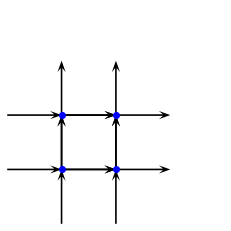

In [10]:
arr2 = np.array(
    [
        [[1,1],[1,1]],
        [[1,1],[1,1]]
    ]
)
visualise_2d_model(arr2)

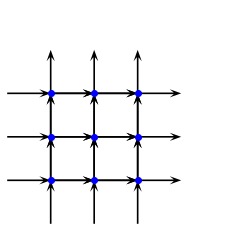

In [11]:
arr3 = np.array(
    [
        [[1,1],[1,1],[1,1]],
        [[1,1],[1,1],[1,1]],
        [[1,1],[1,1],[1,1]]
    ]
)
visualise_2d_model(arr3)

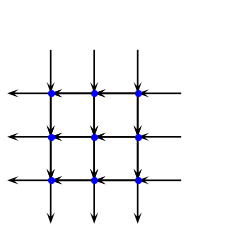

In [12]:
arr4 = np.array(
    [
        [[-1,-1],[-1,-1],[-1,-1]],
        [[-1,-1],[-1,-1],[-1,-1]],
        [[-1,-1],[-1,-1],[-1,-1]]
    ]
)
visualise_2d_model(arr4)